# Topic: Investigating the relationship between BMI and diabetes.

<b>Objective</b>: To examine and analyze the relationship between BMI and the presence of diabetes, in order to understand how BMI may be associated with the likelihood of having diabetes.

<b>Significance</b>: Understanding the impact of these factors can lead to earlier detection of diabetes, potentially improving patient outcomes by targeting high-risk individuals.

<b>Hypothesis</b>: Higher BMI, HbA1c levels increases the risk of causing diabetes

<b>Data Description

The diabetes dataset contains health-related attributes for patients

Features:
1. Gender: Categorical data representing the gender of the patient (Male or Female).
2. AGE: Continuous variable representing the age of the patient (in years).
3. Urea: Continuous variable representing the concentration of urea in the blood (mg/dL), indicating kidney function.
4. Cr (Creatinine): Continuous variable representing the blood creatinine levels (mg/dL), another indicator of kidney function.
5. HbA1c: Continuous variable representing the average blood glucose level over the past 2-3 months (%).
6. Chol (Cholesterol): Continuous variable for total cholesterol levels (mg/dL), indicating cardiovascular health.
7. TG (Triglycerides): Continuous variable representing triglyceride levels in the blood (mg/dL)
8. HDL (High-Density Lipoprotein): Continuous variable representing the "good" cholesterol levels (mg/dL).
9. LDL (Low-Density Lipoprotein): Continuous variable representing the "bad" cholesterol levels (mg/dL)
10. VLDL (Very Low-Density Lipoprotein): Continuous variable related to triglycerides and cholesterol transport in the blood.
11. BMI (Body Mass Index): Continuous variable representing the ratio of weight to height, used as a measure of body fat.
12. CLASS: Categorical data indicating whether the patient has diabetes (positive or negative).

# Data Preprocessing

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler

<b>Data Sources

The values in this dataset are hypothetical and can be publicly accessible

In [2]:
data = pd.read_csv('data.csv')
data = pd.DataFrame(data)

In [3]:
data.head(10)

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,M,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,M,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
5,F,45.0,2.3,24.0,4.0,2.9,1.0,1.0,1.5,0.4,21.0,N
6,F,50.0,2.0,50.0,4.0,3.6,1.3,0.9,2.1,0.6,24.0,N
7,M,48.0,4.7,47.0,4.0,2.9,0.8,0.9,1.6,0.4,24.0,N
8,M,43.0,2.6,67.0,4.0,3.8,0.9,2.4,3.7,1.0,21.0,N
9,F,32.0,3.6,28.0,4.0,3.8,2.0,2.4,3.8,1.0,24.0,N


In [4]:
data.shape

(1009, 12)

<b>Data Cleaning

Data cleaning is a critical step in the data preprocessing, where raw data is transformed into a format that can be effectively analyzed and used for modeling.<br>
It ensures that the data is accurate, consistent making it suitable for analysis.<br>
<br>
Handling Missing Data<br>
Identifying Missing Values: Some records may have missing values in certain columns or rows. These can arise from incomplete data collection or errors during data entry.
<br><br>
Removing or Correcting Outliers<br>
Identifying Outliers: Outliers are extreme values that deviate significantly from the rest of the data, which can distort analysis and model predictions.<br>
Outliers can be identified using:<br>
IQR (Interquartile Range): Data points outside 1.5 times the IQR from the quartiles (Q1, Q3) are usually considered outliers.<br><br>

Data Type Conversion<br>
Correcting Data Types: Ensure that columns have the correct data types (e.g., numeric, categorical, datetime).<br>
For example, the class column is stored as text, it can be converted to integer type.


In [5]:
data.isnull().sum()

Gender    0
AGE       2
Urea      3
Cr        3
HbA1c     6
Chol      5
TG        5
HDL       2
LDL       2
VLDL      4
BMI       2
CLASS     0
dtype: int64

Replacing the null values with it's mean for BMI and median for every other feature

In [6]:
data['Gender'] = data['Gender'].str.upper()
data.fillna(
    {"AGE": data['AGE'].median(),
     "HbA1c": data['HbA1c'].median(),
     "Cr": data['Cr'].median(),
     "BMI": data['BMI'].mode()[0]
    }, inplace=True)
data.fillna(data.mean(numeric_only=True).round(1), inplace=True)
data.isnull().sum()

Gender    0
AGE       0
Urea      0
Cr        0
HbA1c     0
Chol      0
TG        0
HDL       0
LDL       0
VLDL      0
BMI       0
CLASS     0
dtype: int64

Using a Boxplot to detect the outlier values

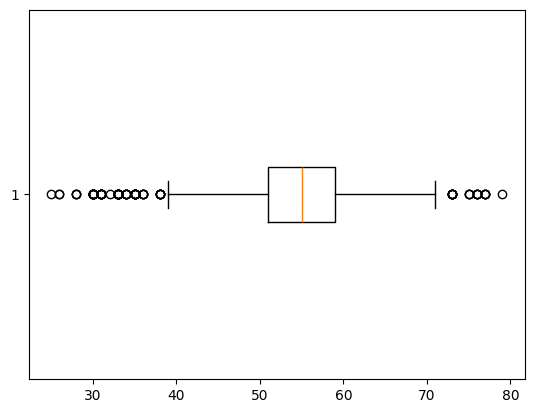

In [7]:
plt.boxplot(data['AGE'], vert=0)
plt.show()

Finding the lower and upper limits using IQR and Eliminating the values outside the range (Outlier Removal)

In [8]:
q1 = data.drop(data[['Gender', 'CLASS', 'LDL']], axis=1).quantile(0.25)
q3 = data.drop(data[['Gender', 'CLASS', 'LDL']], axis=1).quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

data = data[~((data.drop(data[['Gender', 'CLASS', 'LDL']], axis=1) < lower_bound) | (data.drop(data[['Gender', 'CLASS', 'LDL']], axis=1) > upper_bound)).any(axis=1)]

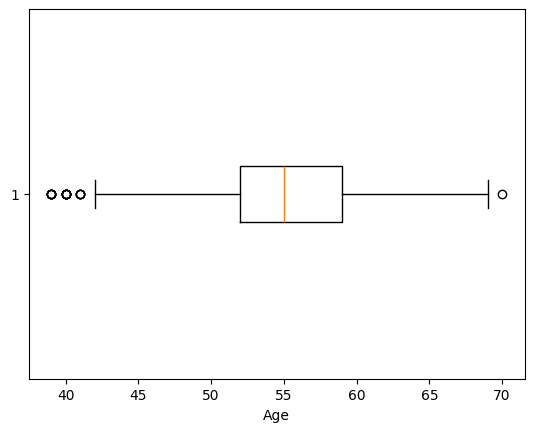

In [9]:
plt.boxplot(data['AGE'], vert=0)
plt.xlabel('Age')
plt.show()

Mapping the Class Labels of Gender and Class to an integer value inorder to train the model <br>
in Gender   Male - 1    Female - 0<br>
in CLASS    Yes - 1     No - 0

In [10]:
data['CLASS'] = data['CLASS'].map({'Y': 1, 'N': 0})
data['Gender'] = data['Gender'].map({'M': 1, 'F': 0})

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 690 entries, 5 to 1008
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  690 non-null    int64  
 1   AGE     690 non-null    float64
 2   Urea    690 non-null    float64
 3   Cr      690 non-null    float64
 4   HbA1c   690 non-null    float64
 5   Chol    690 non-null    float64
 6   TG      690 non-null    float64
 7   HDL     690 non-null    float64
 8   LDL     690 non-null    float64
 9   VLDL    690 non-null    float64
 10  BMI     690 non-null    float64
 11  CLASS   690 non-null    int64  
dtypes: float64(10), int64(2)
memory usage: 70.1 KB


In [11]:
data['CLASS'].unique()

array([0, 1])

In [12]:
data.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
5,0,45.0,2.3,24.0,4.0,2.9,1.0,1.0,1.5,0.4,21.0,0
6,0,50.0,2.0,50.0,4.0,3.6,1.3,0.9,2.1,0.6,24.0,0
7,1,48.0,4.7,47.0,4.0,2.9,0.8,0.9,1.6,0.4,24.0,0
13,0,45.0,4.6,54.0,5.1,4.2,1.7,1.2,2.2,0.8,23.0,0
14,0,50.0,3.5,39.0,4.0,4.0,1.5,1.2,2.2,0.7,24.0,0


<b>Visualization

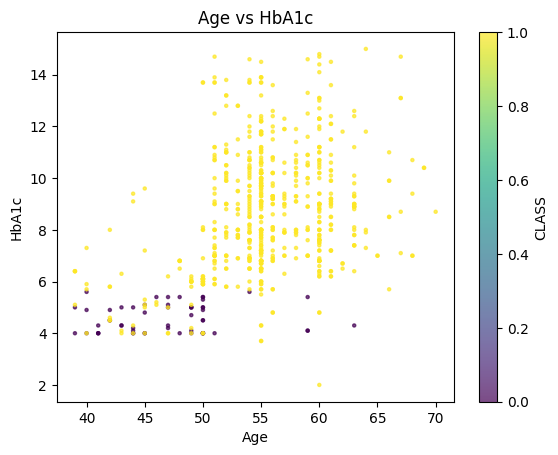

In [13]:
plt.scatter(data['AGE'], data['HbA1c'], c=data['CLASS'], cmap='viridis', alpha=0.7, s=5)
plt.title('Age vs HbA1c')
plt.xlabel('Age')
plt.ylabel('HbA1c')
plt.colorbar(label='CLASS')
plt.show()

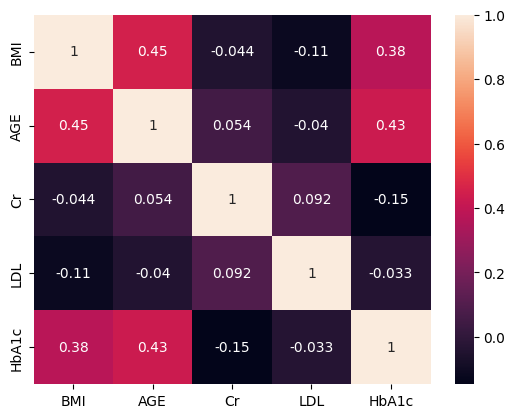

In [14]:
corr_matrix = data[['BMI', 'AGE', 'Cr', 'LDL', 'HbA1c']].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

The pairplot will show scatterplots for each pair of continuous features and the diagonal will show a histogramfor the distribution of each individual feature.

By plotting BMI as a histogram, you can easily identify where most of the data is concentrated.<br>
The mode can be seen as the peak of the histogram.<br>
The mean and median of BMI can also be easily compared to the shape of the histogram to understand how representative they are of the data:

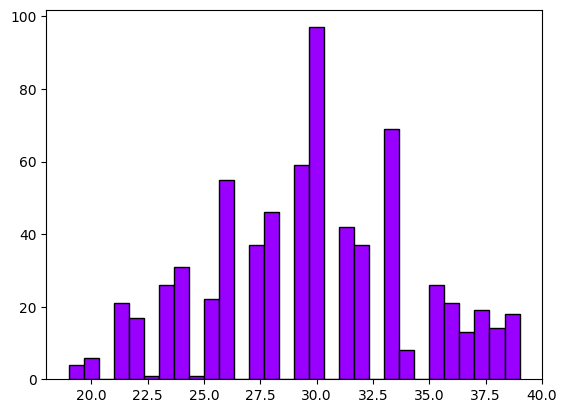

In [42]:
plt.hist(data['BMI'], bins=30, alpha=1, color='#9900ff', edgecolor='black')
plt.show()

We use the box plot on confounding features to make sure the dataset is free of any outlier values

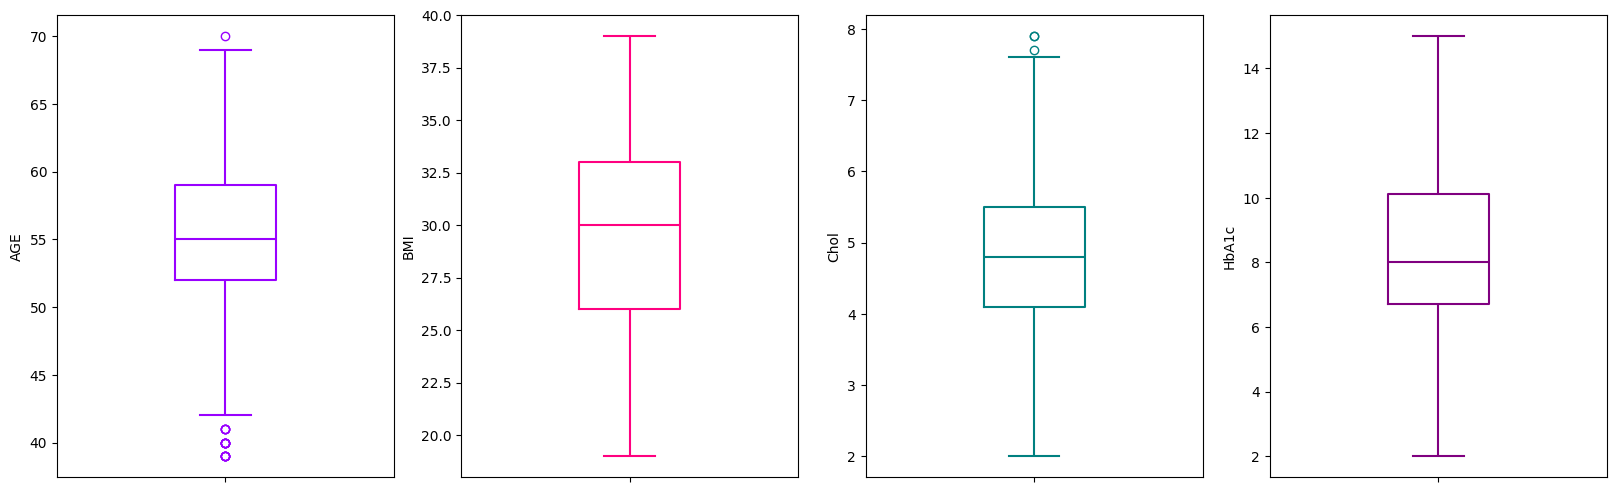

In [17]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 4, 1)
sns.boxplot(data=data['AGE'], fill=False, color='#9900ff', width=.3)
plt.xticks(rotation=90)

plt.subplot(1, 4, 2)
sns.boxplot(data=data['BMI'], fill=False, color='#ff0080', width=.3)
plt.xticks(rotation=90)

plt.subplot(1, 4, 3)
sns.boxplot(data=data['Chol'], fill=False, color='#008080', width=.3)
plt.xticks(rotation=90)

plt.subplot(1, 4, 4)
sns.boxplot(data=data['HbA1c'], fill=False, color='#800080', width=.3)
plt.xticks(rotation=90)

plt.show()

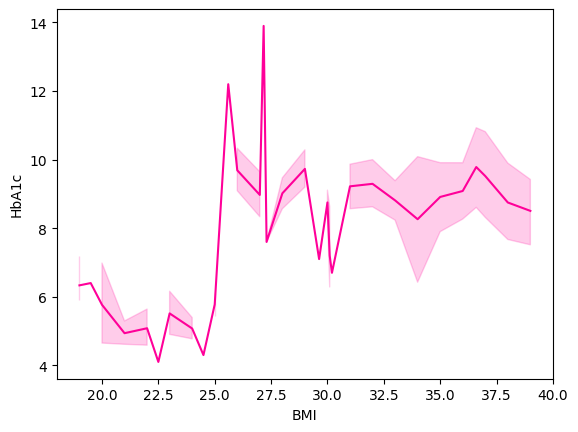

In [39]:
sns.lineplot(x='BMI', y='HbA1c', data=data, color='#FF0099')
plt.show()

# Descriptive Analysis
**Summary of Descriptive Statistics:**
# Inferential Analysis
Hypothesis Testing
is a statistical method used to make inferences or draw conclusions about a population based on sample data. It involves testing an assumption (hypothesis) regarding a population parameter.

**Null Hypothesis:**

**Alternative Hypothesis:**

**Bootstrapping**

**A/B Testing**

# Model Assessment
**Choosing a model:**

**Confidence intervals for accuracy**

**Comparing Classifiers**


# Conclusion and Insights

<b>Summary

1. The analysis shows that BMI and cholesterol levels (particularly LDL and VLDL) are significant factors in predicting the likelihood of diabetes.
2. Bootstrapping allowed for the estimation of confidence intervals, confirming that these variables significantly differ between diabetic and non-diabetic individuals.
3. The A/B test also supported the hypothesis that individuals with diabetes have higher BMI and HbA1c levels than those without diabetes.

<b>Implications

1. These findings suggest that weight management and cholesterol control should be prioritized in diabetes prevention programs.
2. Health policies should include BMI and cholesterol check as part of check-ups to identify any risks earlier.


<b>Limitations

1. Data Limitation: The dataset does not account for non-linear factors (Diet, Exercise routine).
2. Bootstrapping Limitation: Bootstrapping assumes that the data is representative of the population.
3. A/B Testing Limitation: The A/B test results are limited to the specific dataset and does not apply to different populations.